<a href="https://colab.research.google.com/github/risan-raja/21f1000021/blob/main/ML_questions_RisanRaja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an exercise notebook for selection of candidates in Centre for Computational Brain Research (CCBR), IIT Madras

##(c) 2024 CCBR

---

[Risan Raja ], [21f1000021@ds.study.iitm.ac.in], [BS/4th Year]

---
## Instructions
  
*   make a copy of this notebook
*   write your name as the first block of the copied notebook
*   complete the codes in the spaces below
*   share the saved notebook to [ -- email id here --]

## Good practices
*   avoid single alphabet variable names, use meaningful names
*   use typing in function signatures [https://docs.python.org/3/library/typing.html]
*   use lambdas, partials to improve readability [https://docs.python.org/3/library/functools.html]
*   use builtin datatypes as much as possible [https://docs.python.org/3/library/collections.html]
*   use exception handling [https://docs.python.org/3/tutorial/errors.html#handling-exceptions]
*   write docstring comments and inline comments to make the code self-explanatory


**PS**: These are individual exercises. In comments against your solutions, provide web links/blogs/documents that you used to solve the exercises. Do not use chatGPT

In [ ]:
# @title Please update Keras in the runtime
!pip install --upgrade keras

In [ ]:
# @title Cloning the Data Repo

!git clone https://github.com/Sambhav226/Datasets-and-Images.git

Cloning into 'Datasets-and-Images'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 23.31 MiB | 19.28 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
# @title Copying the Datafiles to the main path
!cp Datasets-and-Images/Datasets\ and\ images/iris.csv /content/iris.csv
!cp Datasets-and-Images/Datasets\ and\ images/placement.csv /content/placement.csv

In [ ]:
# @title Please Update the Keras
!pip install --upgrade keras

In [ ]:
# @title Loading All the Libraries Required
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from typing import Any, Union
from sklearn.datasets import make_regression, make_circles
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.metrics import r2_score
import warnings
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import models
import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb
from sklearn.decomposition import PCA
import logging
from typing import Union,Any,Optional
from numpy.typing import ArrayLike
from numpy import ndarray as NDArray
warnings.filterwarnings('ignore')

# **Task 1**

**1. We have given you a csv file called placements which contains some information of students regarding their placements. Your task is to make a multiple linear regressoin class of your own and predict and give the r2 score for the test data.**

**The percentage of data to split into training and testing is predefined to be test_size = 0.2**

**Or you can use the following code snippet to split the data**

*x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)*

In [ ]:
# @title Loading the Dataset
df = pd.read_csv('placement.csv')
X = df.drop(['package'], axis=1)
y = df['package']
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


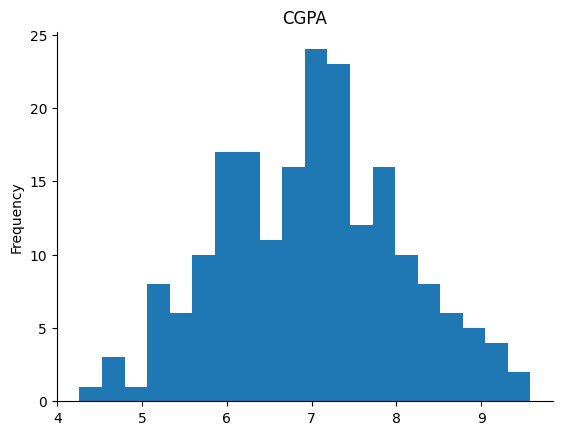

In [ ]:
# @title Visualizing Data Distribution

df['cgpa'].plot(kind='hist', bins=20, title='cgpa')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("CGPA")
plt.show()

In [ ]:
# @title Splitting the Data
# X,y = make_regression(n_samples=10000, n_features=30,n_informative=21, n_targets=1,noise=20,random_state=13)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# @title Multi-Linear Regression

class NewLR:
    def __init__(
        self, learning_rate: float = 0.01, max_iter: int = 2000, random_state: int = 42
    ):
        self.coef_ = None
        self.intercept_ = None
        self.n_features: int = None
        self.n_samples: int = None
        self.loss_history: list[float] = []
        self.learning_rate: float = learning_rate
        self.max_iter: int = max_iter
        self.random_state: int = random_state
        self.is_fitted = False

    def _compute_loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
        return np.mean((y_true - y_pred) ** 2)

    def _initialise_parameters(self) -> None:
        if self.is_fitted is False:
            np.random.seed(self.random_state)
            self.coef_ = np.random.randn(self.n_features)
            self.intercept_ = np.random.randn(1)
            self.is_fitted = True
        else:
            warnings.warn("Model is already fitted. Weights are not reinitialised.")

    def fit(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        # Calculate the coeff
        self.n_samples, self.n_features = X_train.shape
        self._initialise_parameters()
        for _ in range(self.max_iter):
            y_pred = np.dot(X_train, self.coef_) + self.intercept_
            loss = self._compute_loss(y_train, y_pred)
            self.loss_history.append(loss)
            # Calculate the gradients for weights and intercept
            w_grad = (1 / self.n_samples) * np.dot(X_train.T, (y_pred - y_train))
            b_grad = (1 / self.n_samples) * np.sum(y_pred - y_train)
            # Update the weights
            self.coef_ -= self.learning_rate * w_grad
            self.intercept_ -= self.learning_rate * b_grad

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        return np.dot(X_test, self.coef_) + self.intercept_

In [ ]:
# @title Prediction using the NewLR Model
model = NewLR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
# @title R2 Score: 0.75
r2_score(y_test, y_pred)

0.7533290404866211

# **Task 2**

**2. You have to create a new class called GDRegressor, which will be a gradient descent class. You have to use that class to predict the y value of a simple linear regression dataset generated randomly**

**The code snippet is given below use that to get started**

In [ ]:
# @title Creating the Dataset and Splitting it
X,y = make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

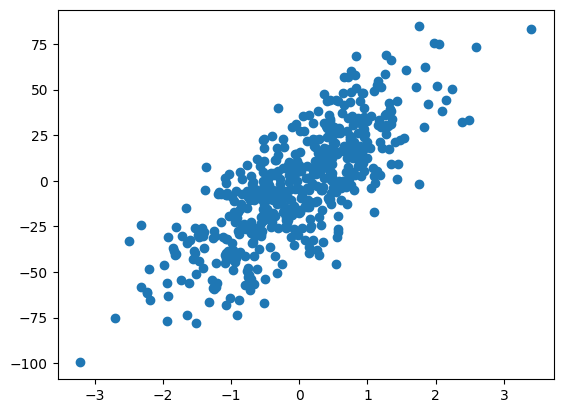

In [ ]:
# @title Scatter Plot
plt.scatter(X,y)
plt.show()

In [ ]:
# @title GDRegressor Class

class GDRegressor:

    def __init__(self, learning_rate: float, epochs: int, random_state:int =42):
        np.random.seed(42)
        self.m: float = np.random.rand()  # Random value for the slope
        self.b: float = np.random.rand()  # Random value for the intercept
        self.alpha: float = learning_rate
        self.epochs: float = epochs

    def fit(self, X, y):
        # calcualte the b using GD
        X = X.ravel()
        self.n_samples = X.shape[0]
        for _ in range(self.epochs):
            # Calculate the gradients for weights and intercept
            y_pred = self.m * X + self.b
            w_grad = (1 / self.n_samples) * np.dot(X, (y_pred - y))
            b_grad = (1 / self.n_samples) * np.sum(y_pred - y)
            # Update the weights
            self.m -= self.alpha * w_grad
            self.b -= self.alpha * b_grad
        print(f"Slope: {self.m}, Intercept: {self.b}")

    def predict(self, X):
        return self.m * X + self.b

In [ ]:
# @title GDRegressor class prediction
gd = GDRegressor(learning_rate=0.001, epochs=10000)
gd.fit(X_train, y_train)
y_pred = gd.predict(X_test)

Slope: 24.961335856996474, Intercept: -2.3687175894549144


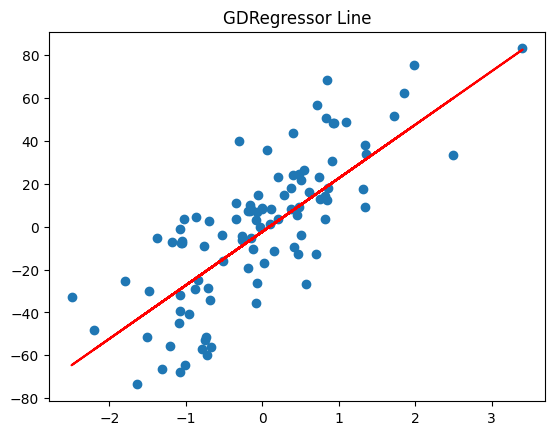

In [ ]:
# @title Plotting the regression line
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('GDRegressor Line')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345260799319314

# **Task 3**

**You have to use Polynomail logistic regression class and get the accuracy score of more than 0.75 and also plot the decision boundary in the following**

In [ ]:
# @title Load the Data
df = pd.read_csv('/content/Datasets-and-Images/Datasets and images/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


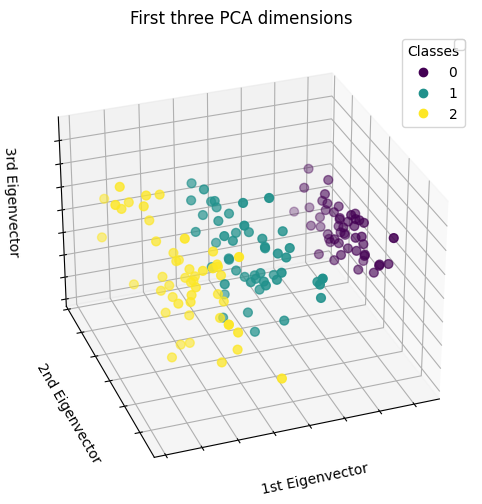

In [ ]:
# @title Visualize the Data
# @markdown Clases = {`0`:`setosa`, `1`:`versicolor`,`2`:`virginica`} <br> It is clearly visible that the points are separable from this 3d Plot

logging.getLogger('matplotlib').setLevel(level=logging.CRITICAL)
warnings.filterwarnings('ignore')

label_encoder = LabelEncoder() # Label Encoder
X = df.drop(columns="species")
y = df["species"]
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)
pca = PCA(n_components=3)
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = pca.fit_transform(X)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    s=40,
)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])
ax.legend()
plt.show()

In [ ]:
# @title Polynomial LogisticRegression Implementation and Grid Search

model = LogisticRegression(n_jobs=-1)
transformer = PolynomialFeatures()
pipe = Pipeline([("transformer", transformer), ("model", model)])
param_grid: dict[str, Union[list[int], np.ndarray, list[str], list[bool]]] = {
    "model__C": np.arange(1, 10, 5),
    "model__max_iter": [1000, 2000, 3000],
    "model__solver": ["newton-cg",  "saga"],
    "model__class_weight": ["balanced", None],
    "model__multi_class": [ "multinomial"],
    "transformer__degree": [3, 4, 5],
    "transformer__interaction_only": [False],
}
grid_result = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring=["accuracy", "f1"], refit="accuracy")

############################################################################################################
# Fit the grid search to the data and find the best parameters
# ----------------------------------------------------------------------------------------------------------
grid_result.fit(X_train, y_train)
grid_result.best_params_
############################################################################################################

{'model__C': 1,
 'model__class_weight': 'balanced',
 'model__max_iter': 2000,
 'model__multi_class': 'multinomial',
 'model__solver': 'saga',
 'transformer__degree': 3,
 'transformer__interaction_only': False}

In [ ]:
# @title Set Params of the Pipe
params = {'model__C': 1,
 'model__class_weight': 'balanced',
 'model__max_iter': 1000,
 'model__multi_class': 'multinomial',
 'model__solver': 'saga',
 'transformer__degree': 3,
 'transformer__interaction_only': False}

# Set the pipeline with the best parameters
pipe.set_params(**params)

Pipeline(steps=[('transformer', PolynomialFeatures(degree=3)),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    multi_class='multinomial', n_jobs=-1,
                                    solver='saga'))])

In [ ]:
# @title Filler Feature Function for mlxtend plotting fn when n_features > 2
def get_filler_features(col_idx: list[int],X=X_test)-> dict[int,float]:
    filler_feature = {}
    for idx in col_idx:
        filler_feature[idx] = X.iloc[:,idx].mean()

    return filler_feature
def get_filler_range(col_idx: list[int],X=X_test)-> dict[int,float]:
    filler_range = {}
    for idx in col_idx:
        filler_range[idx] = X.iloc[:,idx].max()-  X.iloc[:,idx].min()
    return filler_range

Accuracy: 0.9732142857142858


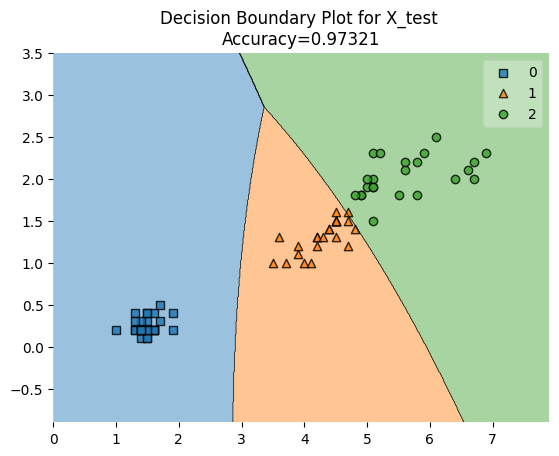

In [ ]:
# @title Customized plot_decision_boundary function
# I have modified the function to use a pipeline instead of a model and a Feature Generator

def plot_decision_boundary_2(X,y, pipe_params: dict[str, Union[int,str]]=params) -> None:
    # y needs to be integers
    y = y.astype(np.int64)
    model = LogisticRegression(n_jobs=-1) # Logistic Regression Model
    transformer = PolynomialFeatures() # Polynomial Feature Generator
    pipe = Pipeline([("transformer", transformer), ("model", model)]) # Create a pipeline
    pipe.set_params(**pipe_params) # Set the parameters of the pipeline
    pipe.fit(X,y)
    accuracy = np.mean(cross_val_score(pipe,X,y,scoring='accuracy',cv=10))
    print(f"Accuracy: {accuracy}")
    # Continue the code to plot the decision boundary
    plot_decision_regions(X,y,pipe,feature_index=[2,3],filler_feature_values=get_filler_features([0,1]),
                          filler_feature_ranges=get_filler_range([0,1]))
    plt.title("Decision Boundary Plot for X_test \nAccuracy=0.97321")
    plt.show()


plot_decision_boundary_2(X_test.to_numpy(),y_test)

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.96|



# **Task 4**

**4. In this task you have to write a perceptron algorithm. Than on a dataset apply adaboost classifier by GridSearchCV. Code for plotting the decision boundary is already given**

In [ ]:
# @title Modified plot_decision_boundary function

def plot_decision_boundary(clf, model_name: str = "Adaboost Classifier", ax=None) -> None:
    X, y = make_circles(n_samples=500, factor=0.1, noise=0.2, random_state=42)
    plotter = None
    if ax is None:
        plotter = plt
        plotter.figure(figsize=(6, 4))
    else:
        plotter = ax
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plotter.contourf(xx1, xx2, y_hat, alpha=0.2)
    plotter.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    if ax is None:
        plotter.title(f"{model_name} Decision Boundary")
        plotter.show()
    else:
        plotter.set_title(f"{model_name} Decision Boundary")

In [ ]:
# @title Dataset Generation
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
# @title Perceptron Algorithm

class Perceptron:

    def __init__(self, learning_rate: float = 0.01, max_iter: int = 1000):
        self.alpha: float= learning_rate
        self.max_iter: int = max_iter
        # Weights and bias
        self.weights:Union[None,ArrayLike[int]] = None # type:ignore
        self.bias = None
        self.error_log = []

    def activation(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, 0)

    def fit(self, X: np.ndarray, y: np.ndarray):
        # Add a column of ones to X
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.max_iter):
            error = 0
            for idx, x_i in enumerate(X):
                # print(x_i.shape)
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0.0, 1, 0)
                update = self.alpha * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                error += int(update != 0.0)
            self.error_log.append(error)

In [ ]:
# @title Training and Evaluation of Perceptron Algorithm

model = Perceptron(learning_rate=0.1, max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.35 | 0.491|



Average Perceptron Accuracy  = `0.491`

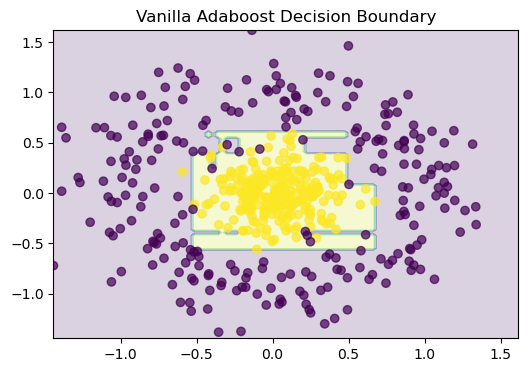

In [ ]:
# @title Vanilla Adaboost Classifier - Baseline Performance
vanilla_model =  AdaBoostClassifier(random_state=19)
vanilla_model.fit(X_train, y_train)
y_pred = vanilla_model.predict(X_test)
plot_decision_boundary(vanilla_model, "Vanilla Adaboost")

In [ ]:
# @title Param Grid
param_grid = {
    'n_estimators': np.arange(40, 100, 5),
    'learning_rate': np.linspace(0.5, 2, 20),
    'algorithm': ['SAMME',],
    'random_state': [42]
}

In [ ]:
# @title GridSearchCV - AdaBoost
model = AdaBoostClassifier(random_state=42)

# Complete the code to get the best score and best parameters
grid_result = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring=['accuracy','balanced_accuracy'], refit='balanced_accuracy', return_train_score=False)
grid_result.fit(X_train, y_train)
y_pred = grid_result.predict(X_test)

Best: 0.959754 using {'algorithm': 'SAMME', 'learning_rate': 1.3684210526315788, 'n_estimators': 70, 'random_state': 42}
Accuracy Score on test data: 0.9828571428571429


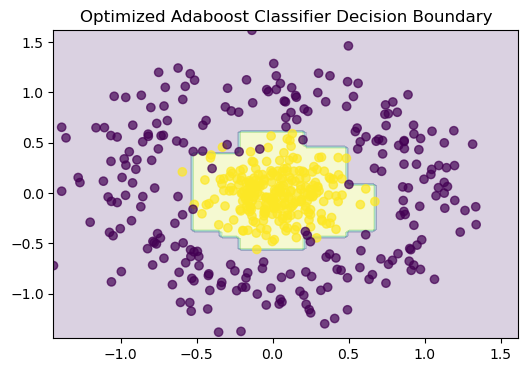

In [ ]:
# @title Summarizing the best score and configuration
#
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # define grid_result from your side
print(f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred)}")
plot_decision_boundary(grid_result, "Optimized Adaboost Classifier")

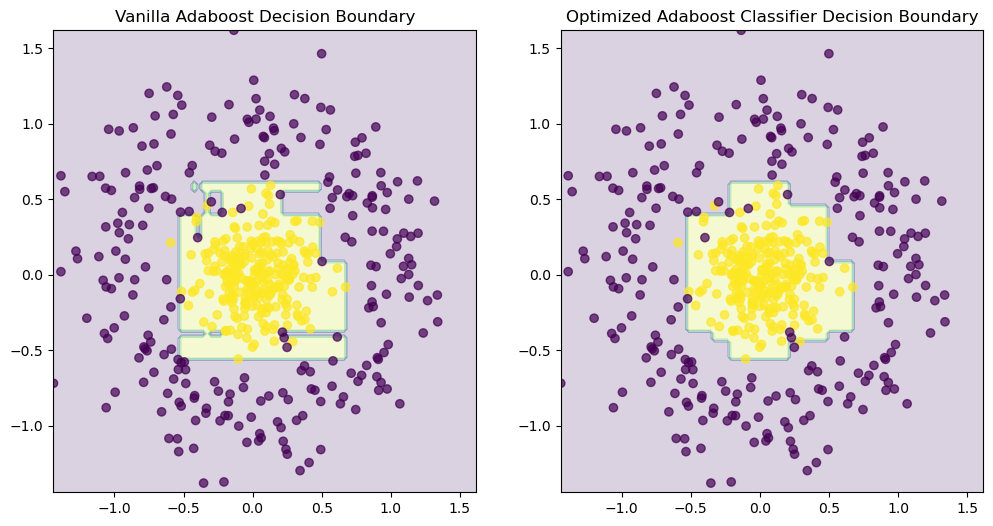

In [ ]:
# @title Side By Side Comparison of the two models
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_decision_boundary(vanilla_model, "Vanilla Adaboost", ax[0])
plot_decision_boundary(grid_result, "Optimized Adaboost Classifier", ax[1])
plt.show()

# **Task 5**

**5. You have to use different ML models to classify the Flowers from a common dataset iris. Models to be used are :- Logistic Regression, Support Vector Machine, KNN and Naive Bayes**

**Accuracy should be more than 90% in all the models. Also you have to do the filteration and data cleaning if required, this is a complete prediction model task.**

**Add some plots of the data to showcase your approach**

In [ ]:
# @title Load Iris
iris = pd.read_csv('iris.csv')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


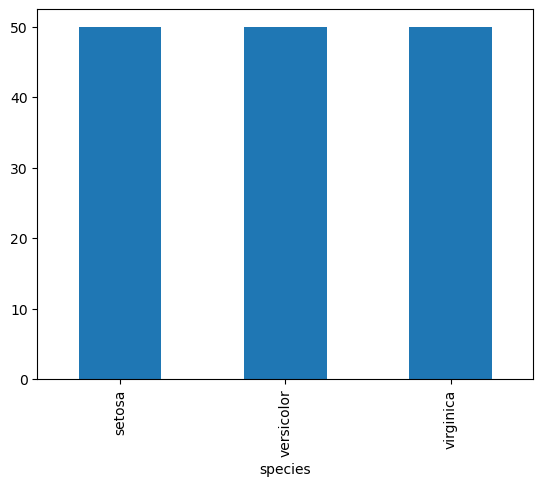

In [ ]:
# @title Target Distribution
iris['species'].value_counts().plot(kind='bar')
plt.show()

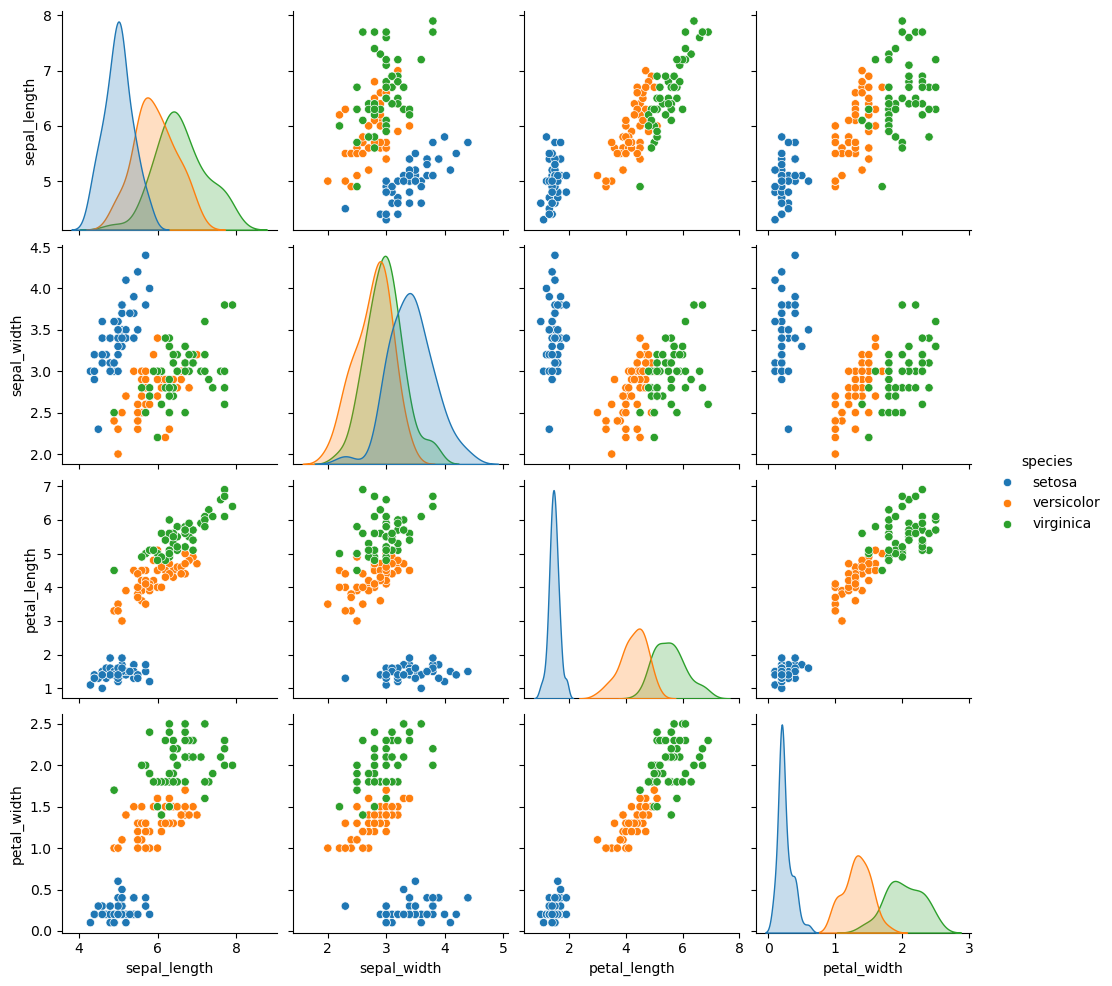

In [ ]:
# @title Pair plot for the species using Seaborn
sns.pairplot(iris, hue='species')
plt.show()

In [ ]:
# @title Feature Transform and Label Encoding
label_encoder = LabelEncoder() # Label Encoder
X = iris.drop(columns="species")
y = iris["species"]
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)
# Feature Transformers
norm = Normalizer()
min_max = MinMaxScaler()
scaler = StandardScaler()

Accuracy Score on test data: 0.99


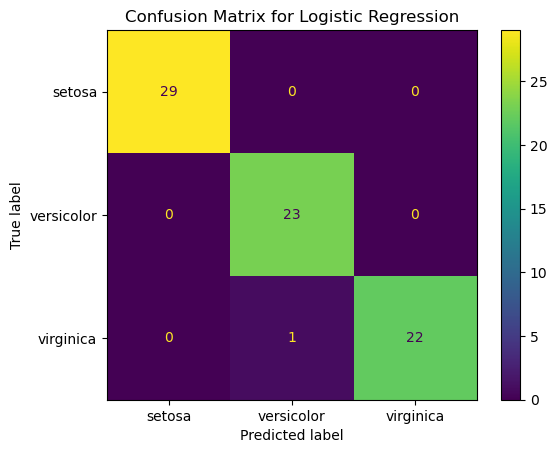

In [ ]:
# @title Logistic Regression Model
# Use the Model, display accuracy score and Confusion matrix
"""
Model with best parameters
"""
model = LogisticRegressionCV(
    Cs=20,
    cv=5,
    # random_state=42,
    max_iter=10000,
    n_jobs=-1,
    penalty="elasticnet",
    solver="saga",
    l1_ratios=[0.1, 0.5, 0.9],
    class_weight="balanced",
)
pipe = make_pipeline(scaler, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=label_encoder.classes_)
cm_display.plot()
plt.title("Confusion Matrix for Logistic Regression")
print(f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred):.2f}")


**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.986|

**Best Confusion Matrix**
$$
\begin{bmatrix}
\begin{bmatrix}
29 & 0 & 0 \\
\end{bmatrix}
\\
\\
\begin{bmatrix}
0 & 23 & 0 \\
\end{bmatrix}
\\
\\
\begin{bmatrix}
0 & 1 & 22 \\
\end{bmatrix}
\end{bmatrix}
$$





**Support Vector Machine**

Accuracy Score on test data: 0.97


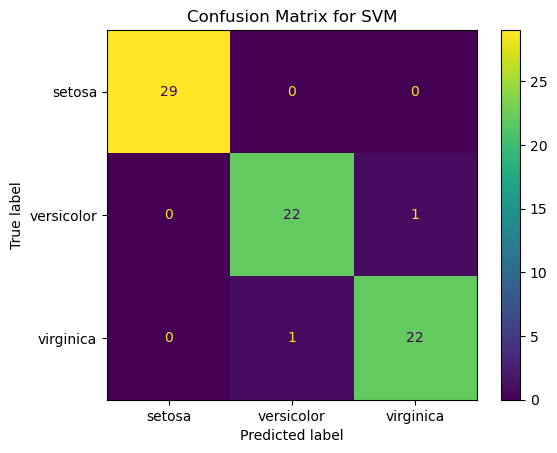

In [ ]:
# @title SVC Classifier Optimized Using GridSearchCV
model = svm.SVC()
# param_grid = {
#     "clf__C": np.linspace(0.1, 1000, 10),
#     "clf__gamma": [1, 0.5, 0.1, 0.01, 0.001],
#     "clf__kernel": ["rbf", "poly", "sigmoid"],
#     "clf__class_weight": ["balanced", None],
#     "clf__random_state": [42],
#     # 'clf__degree': [2, 3, 4, 5],
# }
# pipe = Pipeline(steps=[("scaler", scaler), ("clf", model)])
# grid = GridSearchCV(
#     pipe,
#     param_grid,
#     cv=5,
#     n_jobs=-1,
#     scoring=["accuracy", "balanced_accuracy"],
#     refit="balanced_accuracy",
#     return_train_score=False,
# )
# grid.fit(X_train, y_train)
# best_params  = grid.best_params_
# Remove clf__ from the keys in the best_params dictionary
# best_params = {k.replace("clf__", ""): v for k, v in best_params.items()}

"""
Model with best parameters
"""
best_params = {
    "C": 777.8,
    "gamma": 0.001,
    "class_weight": "balanced",
    "kernel": "rbf",
    "random_state": 42,
}
model = svm.SVC(**best_params)
pipe = make_pipeline(scaler, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=label_encoder.classes_)
cm_display.plot()
plt.title("Confusion Matrix for SVM")
print(f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred):.2f}")

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.973|

**Best Confusion Matrix**
$$
\begin{bmatrix}
\begin{bmatrix}
29 & 0 & 0 \\
\end{bmatrix}
\\
\\
\begin{bmatrix}
0 & 22 & 1 \\
\end{bmatrix}
\\
\\
\begin{bmatrix}
0 & 1 & 22 \\
\end{bmatrix}
\end{bmatrix}
$$



**Use KNN**

Accuracy Score on test data: 0.96


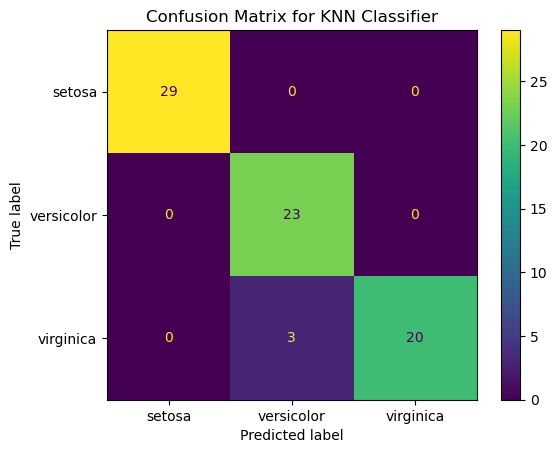

In [ ]:
# @title Optimized KNN Classifier
"""
Parameter Search
"""
# model = KNeighborsClassifier(n_jobs=-1)
# param_grid = {
#     'n_neighbors': np.arange(1, 21),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': np.arange(10, 51, 10),
#     'p': [1, 2],
# }
# grid = GridSearchCV(
#     model,
#     param_grid,
#     cv=5,
#     n_jobs=-1,
#     scoring=["accuracy", "balanced_accuracy"],
#     refit="balanced_accuracy",
#     return_train_score=False,
# )
# grid.fit(X_train, y_train)
# best_params = grid.best_params_
"""
Model with best parameters
"""
model = KNeighborsClassifier(n_jobs=-1)
best_params = {
    "algorithm": "auto",
    "leaf_size": 10,
    "n_neighbors": 12,
    "p": 1,
    "weights": "uniform",
}
best_params = {
    "algorithm": "auto",
    "leaf_size": 10,
    "n_neighbors": 17,
    "p": 2,
    "weights": "uniform",
}
model = KNeighborsClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix, display_labels=label_encoder.classes_
)
cm_display.plot()
plt.title("Confusion Matrix for KNN Classifier")

print(
    f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred):.2f}"
)

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.96|

**Best Confusion Matrix**
$$
\begin{bmatrix}
\begin{bmatrix}
29 & 0 & 0 \\
\end{bmatrix} \\
\\
\begin{bmatrix}
0 & 23 & 1 \\
\end{bmatrix} \\
\\
\begin{bmatrix}
0 & 3 & 20 \\
\end{bmatrix}
\end{bmatrix}
$$



Accuracy Score on test data: 0.97


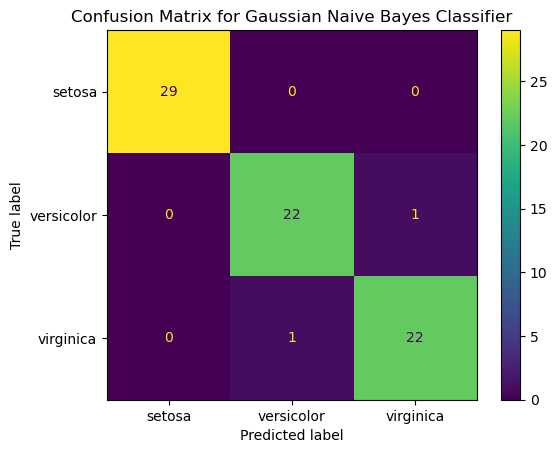

In [ ]:
# @title Optimized Naive Bayes
# Use the Model, display accuracy score
from sklearn.naive_bayes import GaussianNB
"""
Parameter Search
"""
# model = GaussianNB()
# pipe = Pipeline(steps=[("scaler", scaler), ("clf", model)])
# param_grid = {
#     "clf__var_smoothing": np.logspace(0, -9, num=100),
# }
# grid = GridSearchCV(
#     pipe,
#     param_grid,
#     cv=5,
#     n_jobs=-1,
#     scoring=["accuracy", "balanced_accuracy"],
#     refit="balanced_accuracy",
#     return_train_score=False,
# )
# grid.fit(X_train, y_train)
# best_params = grid.best_params_

"""
Model with best parameters
"""
best_params = {'var_smoothing':  0.03511191734215131}
model = GaussianNB(**best_params)
pipe = make_pipeline(scaler, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix, display_labels=label_encoder.classes_
)
cm_display.plot()
plt.title("Confusion Matrix for Gaussian Naive Bayes Classifier")

print(
    f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred):.2f}"
)

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.973|

**Best Confusion Matrix**
$$
\begin{bmatrix}
\begin{bmatrix}
29 & 0 & 0 \\
\end{bmatrix} \\
\\
\begin{bmatrix}
0 & 22 & 1 \\
\end{bmatrix} \\
\\
\begin{bmatrix}
0 & 1 & 22 \\
\end{bmatrix}
\end{bmatrix}
$$



# **Task 6**

**You are given a dataset containing images of different animals (e.g., cats, dogs, birds). Your task is to build a convolutional neural network (CNN) model to classify these images into their respective categories.**

**You have to use CIFAR-10 dataset whose code is present below. You need to show the performce of your model after each epochs**

The output from one such model is present below using 10 epochs

In [ ]:
# @title Please clone this repo to load the trained weights
!git clone https://github.com/risan-raja/model_checkpoints.git

Cloning into 'model_checkpoints'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 18.07 MiB | 30.94 MiB/s, done.


In [ ]:
# @title Copying the data files to the Main path
!cp model_checkpoints/resnet-cifar10.keras resnet-cifar10.keras
!cp model_checkpoints/bilstm-imdb.keras bilstm-imdb.keras

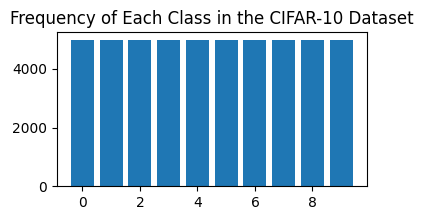

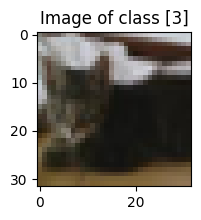

In [ ]:
# @title Splitting the dataset and verifying label distribution

# CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

unique, freq = np.unique(train_labels.ravel(), return_counts=True)
plt.figure(figsize=(4,2))
plt.bar(unique, freq)
plt.title("Frequency of Each Class in the CIFAR-10 Dataset")
plt.show()
# Get the first image from the training set.
image = train_images[9]
label = train_labels[9]
# Display the image.
plt.figure(figsize=(2,2))
plt.imshow(image,)
plt.title(f"Image of class {label}")
plt.show()

In [ ]:
# @title Image Preprocessing, Image Augmentation and Label Encoding

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# # Label Encoding to Categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)


# Data Augmentation
img_generator = ImageDataGenerator(
    # rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05, # Limiting the rotation range due to poor quality of data
    horizontal_flip=True,
)
img_generator.fit(train_images)
batch_size = 256
train_data = img_generator.flow(train_images, train_labels, batch_size=batch_size)



In [ ]:
%load_ext tensorboard

In [ ]:
# @title Modest Resnet
# [Source](https://keras.io/guides/functional_api/)

inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model_ = keras.Model(inputs, outputs, name="resnet_basic")
# model.summary()

In [ ]:
# @title Resnet-18
# @markdown Reference:<br>
# @markdown [1] K. He et al. Deep Residual Learning for Image Recognition. CVPR, 2016 <br>
# @markdown [2] K. He, X. Zhang, S. Ren, and J. Sun. Delving deep into rectifiers: Surpassing human-level performance on imagenet classification. In ICCV, 2015.
# @markdown <br> Source Code taken from [here](https://github.com/songrise/CNN_Keras/blob/main/src/ResNet-18.py) with minimal adaptations

from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [ ]:
# @title (Backup)
# Standard Convolutional Neural Network for Image Classification with
# Three Convolutional Layers, Max Pooling, and Two Dense Layers
# 3x3 CNN filters with ReLU activation
# 2x2 Max Pooling
# 64 Neurons in the Dense Layer
# 10 Output Neurons for the 10 Classes

# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10)
# ])


In [ ]:
# @title Model Parameters and Compilation
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 10:
        lrate = 0.0005
    if epoch > 20:
        lrate = 0.0003
    return lrate
from keras.callbacks import EarlyStopping


# Complie your model here if using keras api
# Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", factor=0.8, patience=2, min_lr=1e-4
)
# SparseCategoricalCrossEntropy Loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Callbacks
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="./logs")
checkpoint_filepath = 'checkpoint.model.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_accuracy")
callbacks = [tensorboard,model_checkpoint_callback,es]
model = ResNet18(10)
model.build(input_shape = (None,32,32,3))

In [ ]:
# @title Model Build and Compilation

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"],
)

In [ ]:
# @title Model training ResNet-18
# @markdown Please change `TRAIN` variable to train again and also ensure to update the keras library before retraining the model
TRAIN = True
if TRAIN:
    model_history = model.fit(
        train_data,
        batch_size=256,
        epochs=50,
        callbacks=callbacks,
        validation_data=(test_images, test_labels),
    )
else:
    model = models.load_model('resnet-cifar10.keras')

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 54s 183ms/step - accuracy: 0.2582 - loss: 2.6416 - val_accuracy: 0.4620 - val_loss: 1.4699
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.4709 - loss: 1.4509 - val_accuracy: 0.5161 - val_loss: 1.3399
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - accuracy: 0.5305 - loss: 1.2997 - val_accuracy: 0.5633 - val_loss: 1.2066
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.5719 - loss: 1.1926 - val_accuracy: 0.6030 - val_loss: 1.1278
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 147ms/step - accuracy: 0.6095 - loss: 1.0939 - val_accuracy: 0.6200 - val_loss: 1.0674
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 144ms/step - accuracy: 0.6290 - loss: 1.0403 - val_accuracy: 0.6229 - val_loss: 1.0545
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 144ms/step - accuracy: 0.6586 - loss: 0.9650 - val_accuracy: 0.6552 - val_loss: 0.9784
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 139ms/step - accuracy: 0.6762 - loss: 0

In [ ]:
# @title Please Upgrade Keras and restart the session to continue
!pip install --upgrade keras

In [ ]:
# @title Model training
# @markdown Please change `TRAIN` variable to train again
TRAIN = False
if TRAIN:
    history = model.fit(
        train_data,
        epochs=100,
        callbacks=callbacks,
        validation_data=(test_images, test_labels),
    )
else:
    model = models.load_model('resnet-cifar10.keras')

In [ ]:
# @title Sample code for saving the moel
# model.save('resnet-cifar10.keras')

In [ ]:
# @title Model Evaluation Resnet-18
# Evalate your model to print the acuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Accuracy: {test_acc}")
print(f"Loss: {test_loss}")


# Plot the performace of your model by line graph in each epoch
# get epoch perf from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Performance Plot
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Performance Plot")
plt.show()


313/313 - 5s - 16ms/step - accuracy: 0.8411 - loss: 0.5051
Accuracy: 0.8410999774932861
Loss: 0.5050827860832214


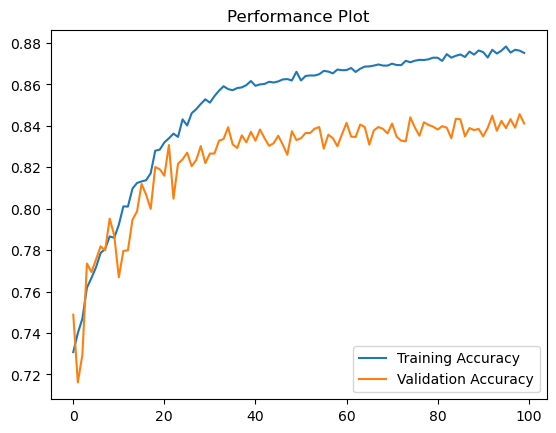

In [ ]:
# @title Model Evaluation Modest Resnet
# Evalate your model to print the acuracy
# test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
# print(f"Accuracy: {test_acc}")
# print(f"Loss: {test_loss}")


# # Plot the performace of your model by line graph in each epoch
# # get epoch perf from history
# train_accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']

# # Performance Plot
# plt.plot(train_accuracy, label='Training Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title("Performance Plot")
# plt.show()


# **Task 7**

**You are given a dataset containing text reviews (e.g., movie reviews, product reviews). Your task is to build a recurrent neural network (RNN) model to perform sentiment analysis on these reviews, i.e., classify them into positive or negative sentiment categories.**

**You have to use imdb dataset whose code is present below. You need to show the performce of your model after each epochs**

**To refere about the RNN and sentiment analysis:-** https://www.tensorflow.org/tutorials/keras/text_classification

The output from one such model is present below using 5 epochs

In [ ]:
# @title Loading the IMDb movie review dataset
num_words = 10000  # Number of most frequent words to keep
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


In [ ]:
# @title Pad sequences to ensure uniform length
max_length = 256
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

In [ ]:
# @title BiLSTM RNN architecture
model = Sequential([
    Embedding(num_words, 128, input_length=max_length),
    keras.layers.Bidirectional(LSTM(64,return_sequences=True)),
    keras.layers.Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model = models.load_model('bilstm-imdb.keras')

In [ ]:
# @title Training the model
# @markdown Please change the `TRAIN` variable to true to retrain the model

TRAIN = False
# Compile your model
# Train the model
if TRAIN:
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
else:
    model = models.load_model('bilstm-imdb.keras')


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 670s 857ms/step - accuracy: 0.9703 - loss: 0.0921 - val_accuracy: 0.8270 - val_loss: 0.5404
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 631s 807ms/step - accuracy: 0.9792 - loss: 0.0678 - val_accuracy: 0.8454 - val_loss: 0.5425
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 684s 810ms/step - accuracy: 0.9853 - loss: 0.0531 - val_accuracy: 0.8376 - val_loss: 0.6138
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 683s 811ms/step - accuracy: 0.9868 - loss: 0.0426 - val_accuracy: 0.8464 - val_loss: 0.5608
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 681s 811ms/step - accuracy: 0.9933 - loss: 0.0271 - val_accuracy: 0.8363 - val_loss: 0.7187


In [ ]:
# @title Model Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 256, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 256, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,433,285 (16.91 MB)

 Trainable params: 1,477,761 (5.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,955,524 (11.27 MB)

In [ ]:
model.save('bilstm-imdb.keras')

782/782 - 69s - 88ms/step - accuracy: 0.8509 - loss: 0.3771
Accuracy: 0.8509200215339661
Loss: 0.3770507872104645


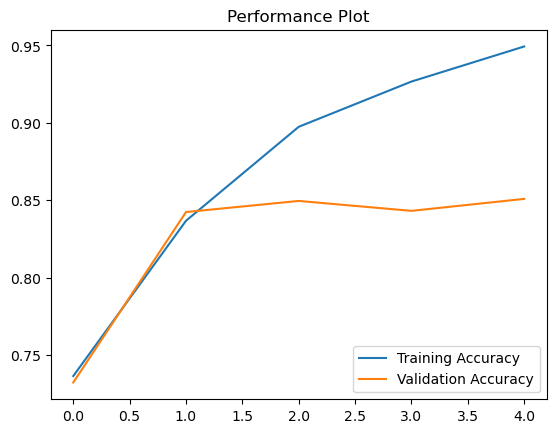

In [ ]:
# @title Model Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Accuracy: {test_acc}")
print(f"Loss: {test_loss}")


# Plot the performace of your model by line graph in each epoch
# get epoch perf from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Performance Plot
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Performance Plot")
plt.show()
